In [29]:
from HrToLrProcess import image_generator,imread
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras import models

### 이미지 제너레이터

In [15]:
# 이미지 디렉토리 경로
path = './train/*'

In [16]:
train_ds = image_generator(path)

28


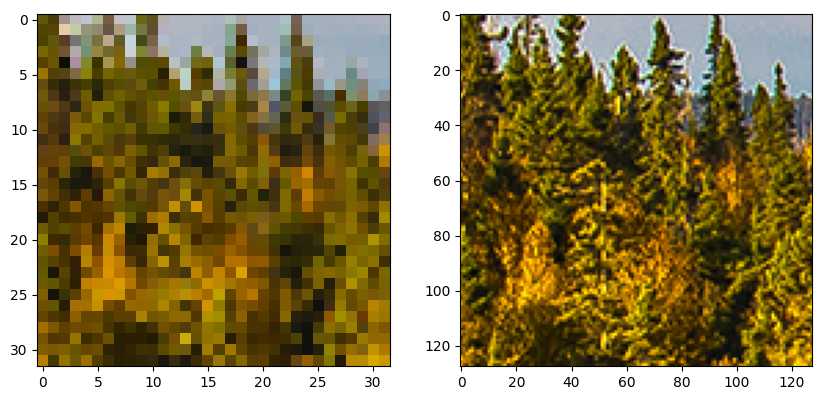

In [19]:
for i, (lr_image,hr_image) in enumerate(train_ds):
    clear_output(wait=True)
    print(i)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow((lr_image*0.5+0.5)[0])

    plt.subplot(1,2,2)
    plt.imshow((hr_image*0.5+0.5)[0])
    plt.show()
    time.sleep(1)

In [20]:
fake_images = {}

In [23]:
lr_image = imread('./image/dwayne.jpg')
shape = lr_image.shape
lr_image = cv2.resize(lr_image,(int(shape[1]/(1.5)),int(shape[0]//(1.5))))

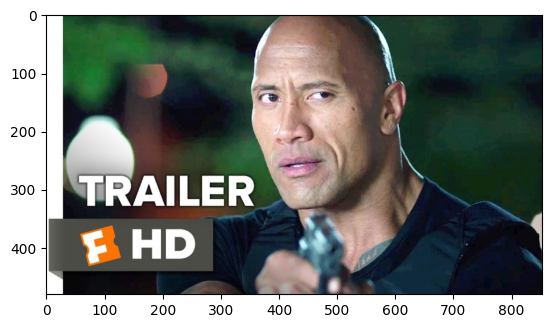

In [24]:
plt.imshow(lr_image)
plt.show()

In [27]:
preprocess_image = (lr_image/127.5-1)[np.newaxis]

### 각 모델 비교

#### version1

In [30]:
generator_model = models.load_model('./model/srgan_version1/generator_model.h5')

In [31]:
fake_image = generator_model.predict(preprocess_image)[0]
fake_image[fake_image>1] = 1
fake_image[fake_image<-1] = -1
fake_image = ((fake_image*0.5+0.5)*255).astype('uint8')

1/1 [==============================] - 4s 4s/step


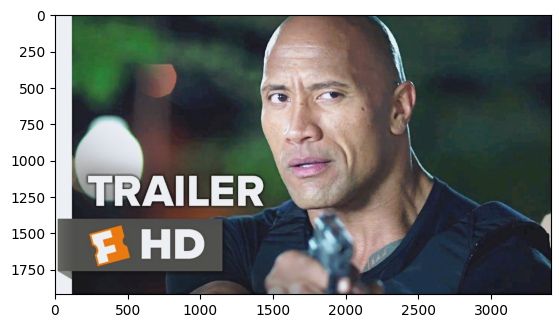

In [32]:
plt.imshow(fake_image)
plt.show()

In [33]:
fake_images['srgan_version1'] = fake_image

#### version2

In [35]:
generator_model = models.load_model('./model/srgan_version2/generator_model.h5')

In [36]:
fake_image = generator_model.predict(preprocess_image)[0]
fake_image[fake_image>1] = 1
fake_image[fake_image<-1] = -1
fake_image = ((fake_image*0.5+0.5)*255).astype('uint8')

1/1 [==============================] - 0s 338ms/step


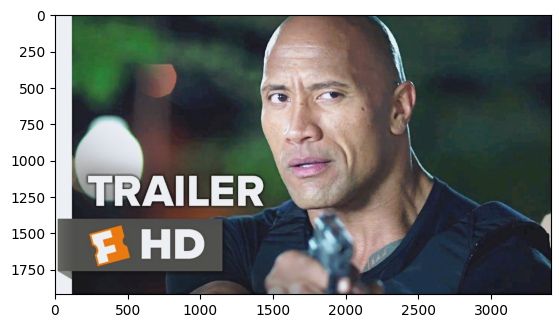

In [37]:
plt.imshow(fake_image)
plt.show()

In [38]:
fake_images['srgan_version2'] = fake_image

#### version4

In [39]:
generator_model = models.load_model('./model/srgan_version4/generator_model.h5')

In [40]:
fake_image = generator_model.predict(preprocess_image)[0]
fake_image[fake_image>1] = 1
fake_image[fake_image<-1] = -1
fake_image = ((fake_image*0.5+0.5)*255).astype('uint8')

1/1 [==============================] - 15s 15s/step


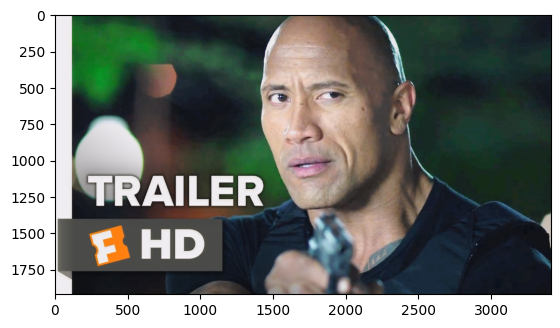

In [41]:
plt.imshow(fake_image)
plt.show()

In [42]:
fake_images['srgan_version4'] = fake_image

### 각 모델 이미지 픽셀 밀도 차이

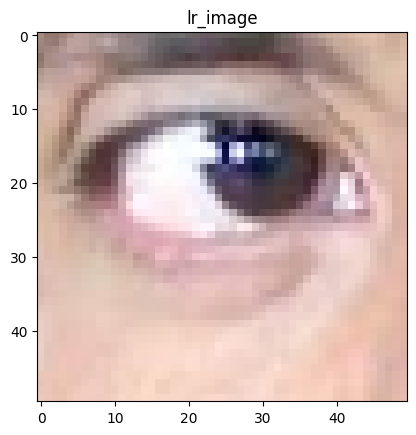

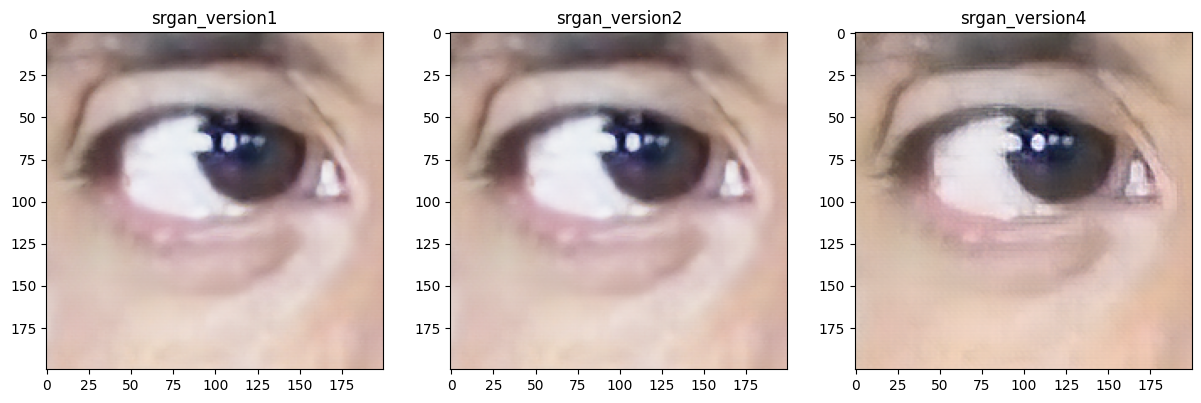

In [43]:
height = fake_image.shape[0]
width = fake_image.shape[1]

length = 200
height = np.random.randint(0,height-length)
width = np.random.randint(0,width-length)
height = (500,940)[0]
width = (1440,1620)[0]

plt.title('lr_image')
plt.imshow(lr_image[height//4:(height+length)//4,width//4:(width+length)//4,:])
plt.show()

plt.figure(figsize=(20,10))
for i,name in enumerate(fake_images):
    plt.subplot(1,4,1+i)
    plt.title(name)
    plt.imshow(fake_images[name][height:height+length,width:width+length,:])

plt.show()

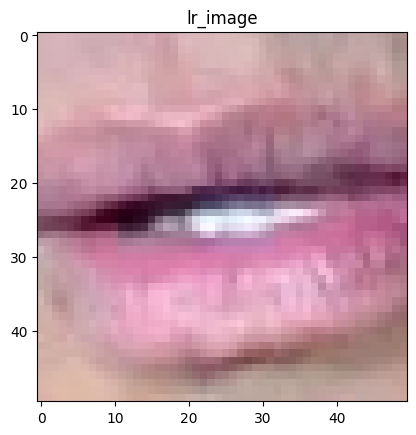

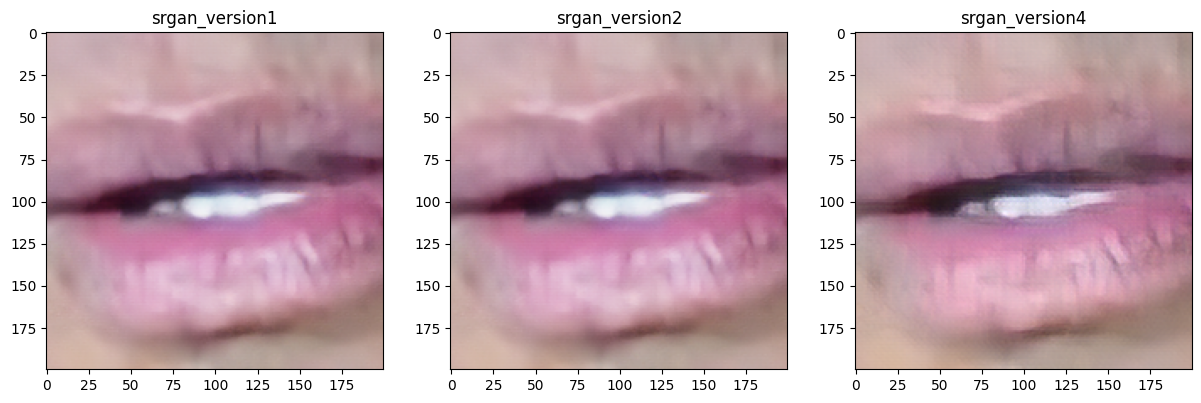

In [44]:
height = fake_image.shape[0]
width = fake_image.shape[1]

length = 200
height = np.random.randint(0,height-length)
width = np.random.randint(0,width-length)
height = (500,940)[1]
width = (1440,1620)[1]

plt.title('lr_image')
plt.imshow(lr_image[height//4:(height+length)//4,width//4:(width+length)//4,:])
plt.show()

plt.figure(figsize=(20,10))
for i,name in enumerate(fake_images):
    plt.subplot(1,4,1+i)
    plt.title(name)
    plt.imshow(fake_images[name][height:height+length,width:width+length,:])

plt.show()